## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [56]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import sklearn
print(sklearn.__version__)

1.3.1


### Lectura del dataset generado previamente

In [57]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,ingresos,pct_ingreso,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,menor_25,C,C,11000,3,HIPOTECA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,20k_a_50k,hasta_20,menor_25,S,P,1500,2,ALQUILER,MEJORAS_HOGAR,Y,PASIVO,M,DESCONOCIDO,0.0
2,15_a_30,2k_a_4k,5k_a_10k,2y_a_4y,20k_a_50k,20_a_40,menor_25,D,C,10000,2,OTROS,EDUCACIÓN,Y,PASIVO,M,POSGRADO_COMPLETO,3.0
3,75_a_100,2k_a_4k,menor_3k,menor_2y,20k_a_50k,20_a_40,25_a_30,S,C,6000,4,ALQUILER,INVERSIONES,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,50k_a_100k,20_a_40,25_a_30,C,C,10000,2,HIPOTECA,EDUCACIÓN,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0


### Revisión de meta-datos

In [58]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
ingresos
pct_ingreso
edad
estado_civil
estado_credito
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
personas_a_cargo

Cantidad de filas: 9595


### Armado de los sets de entrenamiento y testeo

In [59]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'ingresos', 'pct_ingreso',
       'edad', 'estado_civil', 'estado_credito', 
       'importe_solicitado', 'duracion_credito', 'situacion_vivienda', 
       'objetivo_credito', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,ingresos,pct_ingreso,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,menor_25,C,C,11000,3,HIPOTECA,INVERSIONES,ACTIVO,F,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,20k_a_50k,hasta_20,menor_25,S,P,1500,2,ALQUILER,MEJORAS_HOGAR,PASIVO,M,DESCONOCIDO,0.0
2,15_a_30,2k_a_4k,5k_a_10k,2y_a_4y,20k_a_50k,20_a_40,menor_25,D,C,10000,2,OTROS,EDUCACIÓN,PASIVO,M,POSGRADO_COMPLETO,3.0
3,75_a_100,2k_a_4k,menor_3k,menor_2y,20k_a_50k,20_a_40,25_a_30,S,C,6000,4,ALQUILER,INVERSIONES,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,50k_a_100k,20_a_40,25_a_30,C,C,10000,2,HIPOTECA,EDUCACIÓN,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0


In [60]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_2k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,11000,3,3.0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
1,1500,2,0.0,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
2,10000,2,3.0,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,6000,4,2.0,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4,10000,2,2.0,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [61]:
# Para evitar problemas con mlflow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [62]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.20) 

# Se indica un 80% (entrenamiento) - 20% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          7500.0
duracion_credito                               2.0
personas_a_cargo                               0.0
operaciones_ult_12m_15_a_30                  False
operaciones_ult_12m_30_a_50                  False
operaciones_ult_12m_50_a_75                  False
operaciones_ult_12m_75_a_100                  True
operaciones_ult_12m_mayor_100                False
operaciones_ult_12m_menor_15                 False
gastos_ult_12m_2k_a_4k                       False
gastos_ult_12m_4k_a_6k                        True
gastos_ult_12m_6k_a_8k                       False
gastos_ult_12m_8k_a_10k                      False
gastos_ult_12m_mayor_10k                     False
gastos_ult_12m_menor_1k                      False
limite_credito_tc_3k_a_5k                    False
limite_credito_tc_5k_a_10k                   False
limite_credito_tc_mayor_10k                  False
limite_credito_tc_menor_3k                    True


In [63]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [64]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

#### ZeroR

In [65]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

2023/12/10 23:45:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eb4b8caf2bed46428637cee712105e55', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\shaq4\anaconda3\envs\viu-13mbid\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DummyClassifier(constant=None, random_state=None, strategy='prior')

In [66]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8212610734757686
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [67]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

2023/12/10 23:45:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


2023/12/10 23:45:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Regresión Logística

In [68]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8410630536737884
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.85      0.98      0.91      1576
           Y       0.66      0.22      0.34       343

    accuracy                           0.84      1919
   macro avg       0.76      0.60      0.62      1919
weighted avg       0.82      0.84      0.81      1919

Matriz de confusión:


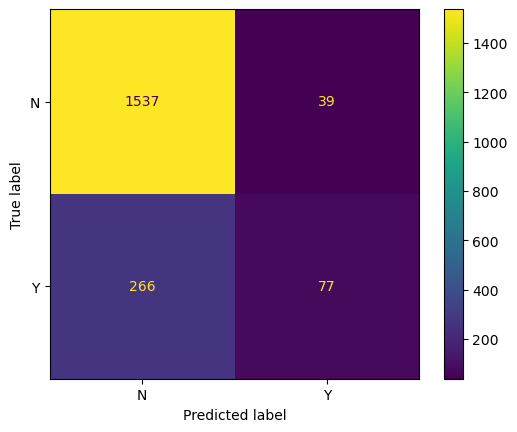

In [69]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.822303282959875
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.82      1.00      0.90      1576
           Y       0.75      0.01      0.02       343

    accuracy                           0.82      1919
   macro avg       0.79      0.50      0.46      1919
weighted avg       0.81      0.82      0.74      1919

Matriz de confusión:


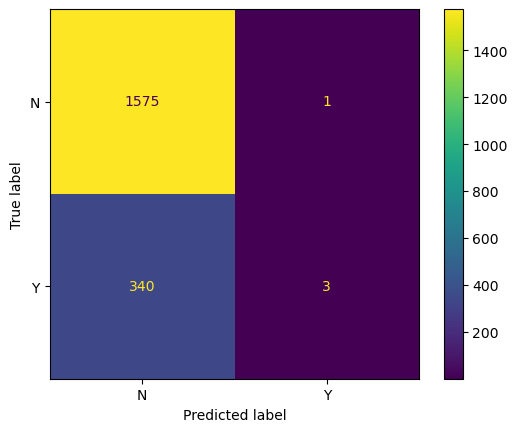

In [71]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [72]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.8681605002605524
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.93      0.92      1576
           Y       0.65      0.58      0.61       343

    accuracy                           0.87      1919
   macro avg       0.78      0.75      0.77      1919
weighted avg       0.86      0.87      0.87      1919

Matriz de confusión:


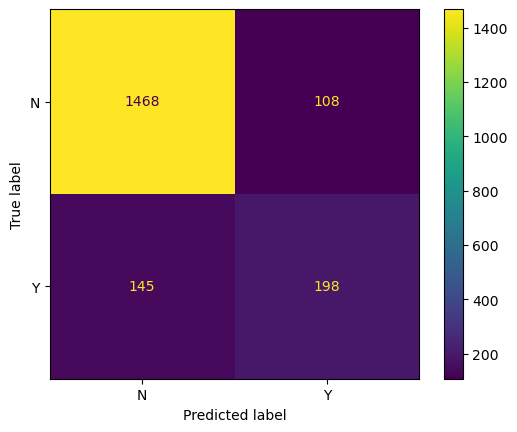

In [73]:
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8619072433559145
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.88      0.96      0.92      1576
           Y       0.70      0.40      0.51       343

    accuracy                           0.86      1919
   macro avg       0.79      0.68      0.71      1919
weighted avg       0.85      0.86      0.85      1919

Matriz de confusión:


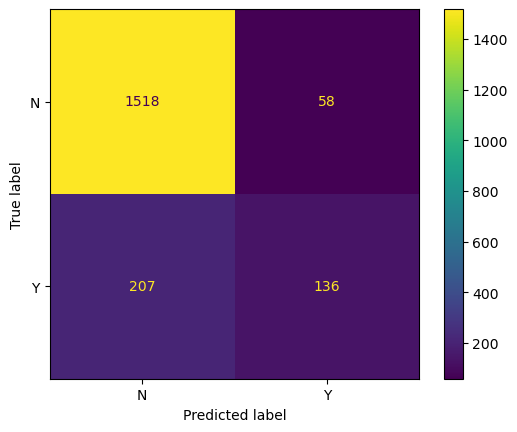

In [75]:
evaluar_modelo(rndf, test_data, test_labels)

----
Prueba #2

#### Árboles de Decisión (TDIDT)

In [76]:
mlflow.set_experiment(experiment_name="Prueba #2")


<Experiment: artifact_location='file:///c:/Users/shaq4/Documents/Universidad/VIU/Master/13MBID/13MBID-ABR23/notebooks/03-Modelado%2BEvaluacion/mlruns/672908178879278805', creation_time=1700775797746, experiment_id='672908178879278805', last_update_time=1700775797746, lifecycle_stage='active', name='Prueba #2', tags={}>

In [77]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=15)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8728504429390307
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.97      0.93      1576
           Y       0.74      0.45      0.56       343

    accuracy                           0.87      1919
   macro avg       0.81      0.71      0.74      1919
weighted avg       0.86      0.87      0.86      1919

Matriz de confusión:


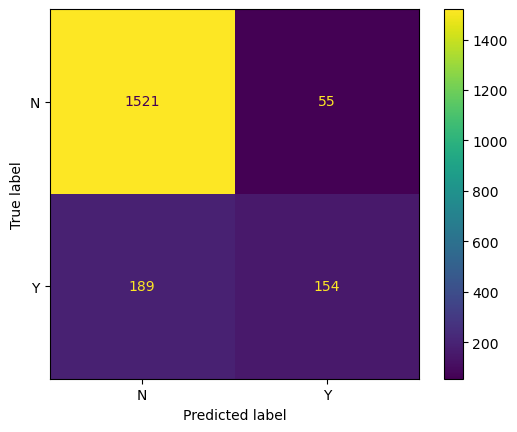

In [78]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [79]:
with mlflow.start_run(run_name='Random Forest (#2)'):
    rndf = RandomForestClassifier(n_estimators=100)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8764981761334029
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.96      0.93      1576
           Y       0.74      0.48      0.58       343

    accuracy                           0.88      1919
   macro avg       0.82      0.72      0.75      1919
weighted avg       0.87      0.88      0.87      1919

Matriz de confusión:


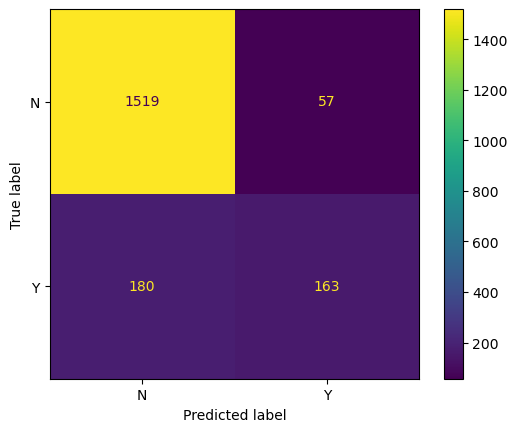

In [80]:
evaluar_modelo(rndf, test_data, test_labels)

#### Regresión Logística

In [81]:
with mlflow.start_run(run_name='Logistic Regression (#2)'):
    lreg = LogisticRegression(solver = 'lbfgs')

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8655549765502866
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.94      0.92      1576
           Y       0.65      0.54      0.59       343

    accuracy                           0.87      1919
   macro avg       0.78      0.74      0.75      1919
weighted avg       0.86      0.87      0.86      1919

Matriz de confusión:


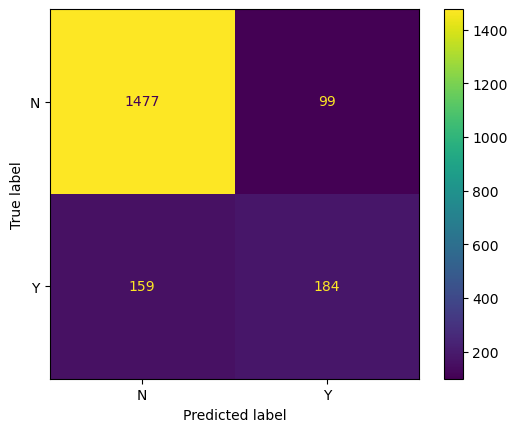

In [82]:
evaluar_modelo(lreg, test_data, test_labels)

----
Prueba #3

#### Árboles de Decisión (TDIDT)

In [83]:
mlflow.set_experiment(experiment_name="Prueba #3")


<Experiment: artifact_location='file:///c:/Users/shaq4/Documents/Universidad/VIU/Master/13MBID/13MBID-ABR23/notebooks/03-Modelado%2BEvaluacion/mlruns/838201423829002473', creation_time=1701646934830, experiment_id='838201423829002473', last_update_time=1701646934830, lifecycle_stage='active', name='Prueba #3', tags={}>

In [84]:
with mlflow.start_run(run_name='Decision Tree (#3)'):
    dtc = DecisionTreeClassifier(max_depth=None, 
                                 criterion='gini', 
                                 min_samples_split=2)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8176133402813965
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.89      0.89      1576
           Y       0.49      0.47      0.48       343

    accuracy                           0.82      1919
   macro avg       0.69      0.68      0.68      1919
weighted avg       0.81      0.82      0.82      1919

Matriz de confusión:


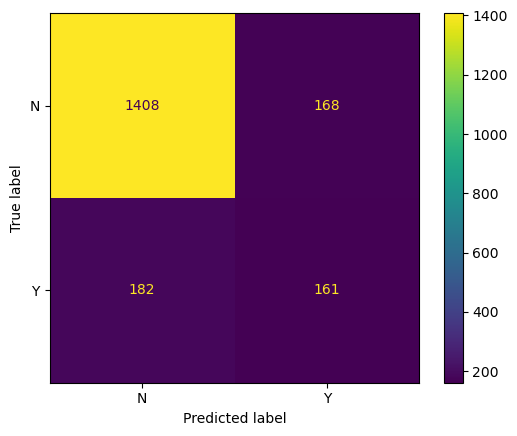

In [85]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [86]:
with mlflow.start_run(run_name='Random Forest (#3)'):
    rndf = RandomForestClassifier(n_estimators=200)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8738926524231371
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.96      0.93      1576
           Y       0.73      0.46      0.57       343

    accuracy                           0.87      1919
   macro avg       0.81      0.71      0.75      1919
weighted avg       0.86      0.87      0.86      1919

Matriz de confusión:


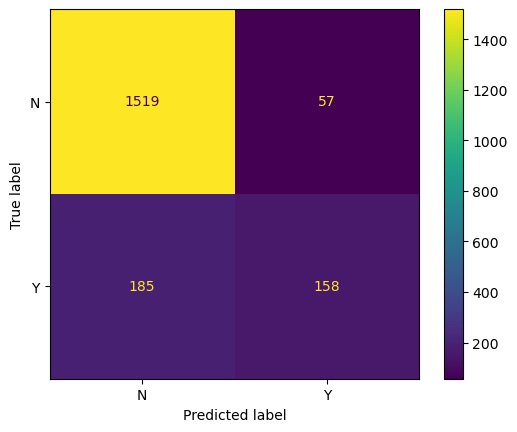

In [87]:
evaluar_modelo(rndf, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas 
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los clientes.
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

----

### Prueba de despliegue (utilzando datos nuevos)

In [88]:
datos_nuevos_sin_filtrar = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos_sin_filtrar.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

Limpieza de los datos (filtrado a nivel de filas)

In [89]:
#Se puede definir una función para aplicar los cálculos
def regla_pct_ingresos_credito(row):
    pct_ingreso = row.pct_ingreso
    ingresos = row.ingresos
    
    if pct_ingreso > 0.5 and ingresos <= 20000:
        # Es un error, no cumple la regla definida
        return 'err'
    else:
        return 'ok'


# Se aplica la función para todos los elementos del dataset
regla_pct_ingresos = datos_nuevos_sin_filtrar.apply(lambda row: regla_pct_ingresos_credito(row), axis=1).rename("regla_pct_ingresos")

# Se unen los resultados al dataset inicial
datos_nuevos_sin_filtrar = pd.concat([datos_nuevos_sin_filtrar, regla_pct_ingresos], axis=1)
datos_nuevos_sin_filtrar.head(5)  

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo,regla_pct_ingresos
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0,ok
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0,ok
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0,ok
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0,ok
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0,ok


In [90]:
datos_nuevos_sin_filtrar[datos_nuevos_sin_filtrar['regla_pct_ingresos'] == 'err'].shape[0]

0

In [91]:
def regla_2(row):
    pct_ingreso = row.pct_ingreso
    duracion = row.duracion_credito
    situacion_vivienda = row.situacion_vivienda
    
    if duracion == 2 and pct_ingreso > 0.6 and situacion_vivienda != 'PROPIA':
        # Es un error, no cumple la regla definida
        return 'err'
    else:
        return 'ok'

# Se aplica la función para todos los elementos del dataset
regla_dos = datos_nuevos_sin_filtrar.apply(lambda row: regla_2(row), axis=1).rename("regla_2")

# Se unen los resultados al dataset inicial
datos_nuevos_sin_filtrar = pd.concat([datos_nuevos_sin_filtrar, regla_dos], axis=1)
datos_nuevos_sin_filtrar.head(5)  

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo,regla_pct_ingresos,regla_2
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0,ok,ok
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0,ok,ok
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0,ok,ok
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0,ok,ok
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0,ok,ok


In [92]:
datos_nuevos_sin_filtrar[datos_nuevos_sin_filtrar['regla_2'] == 'err'].shape[0]

0

In [93]:
# Se filtran las filas con algún error detectado
print(f"Filas antes del filtro: {datos_nuevos_sin_filtrar.shape[0]}")

temp = datos_nuevos_sin_filtrar[datos_nuevos_sin_filtrar['edad'] < 90]

# Otro filtro posible: por la regla de negocio agregada

temp_c = temp[temp['regla_pct_ingresos'] == 'ok']
temp_cc = temp_c[temp_c['regla_2'] == 'ok']

print(f"Filas después del filtro: {temp_cc.shape[0]}")

Filas antes del filtro: 112
Filas después del filtro: 112


In [94]:
# Se filtran las filas con algún error detectado
print(f"Filas antes del filtro: {temp_cc.shape[0]}")

datos_nuevos = temp_cc[temp_cc['limite_credito_tc'] != 34516]

print(f"Filas después del filtro: {datos_nuevos.shape[0]}")

print(f"Filas filtradas: {datos_nuevos_sin_filtrar.shape[0] - datos_nuevos.shape[0]}")

Filas antes del filtro: 112
Filas después del filtro: 109
Filas filtradas: 3


In [95]:
print(f"Cantidad de columnas del dataset integrado: {datos_nuevos.shape[1]}")

Cantidad de columnas del dataset integrado: 23


In [96]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.59, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# ingresos_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '1k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente',
              'regla_pct_ingresos',
              'regla_2']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, ingresos_N, pct_ingreso_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

C:\Users\shaq4\AppData\Local\Temp\ipykernel_440\2484418978.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,ingresos,pct_ingreso,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,menor_25,S,C,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,75_a_100,1k_a_4k,menor_3k,menor_2y,mayor_100k,hasta_20,25_a_30,C,C,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,1k_a_4k,3k_a_5k,2y_a_4y,20k_a_50k,hasta_20,menor_25,C,C,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,25_a_30,C,C,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,25_a_30,C,C,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [97]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 0 to 111
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        109 non-null    int64  
 1   duracion_credito                          109 non-null    int64  
 2   personas_a_cargo                          109 non-null    float64
 3   operaciones_ult_12m_menor_15              109 non-null    bool   
 4   operaciones_ult_12m_15_a_30               109 non-null    bool   
 5   operaciones_ult_12m_30_a_50               109 non-null    bool   
 6   operaciones_ult_12m_50_a_75               109 non-null    bool   
 7   operaciones_ult_12m_75_a_100              109 non-null    bool   
 8   operaciones_ult_12m_mayor_100             109 non-null    bool   
 9   gastos_ult_12m_menor_1k                   109 non-null    bool   
 10  gastos_ult_12m_1k_a_4k                    1

In [98]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'gastos_ult_12m_2k_a_4k', 'situacion_vivienda_OTROS'}

Datos nuevos: 59
Datos entrenamiento: 58
set()


In [99]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'operaciones_ult_12m_menor_15',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'gastos_ult_12m_menor_1k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'limite_credito_tc_menor_3k',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'antiguedad_cliente_menor_2y', 'ingresos_20k_a_50k',
       'ingresos_50k_a_100k', 'ingresos_hasta_20k', 'ingresos_mayor_100k',
       'pct_ingreso_20_a_40', 'pct_ingreso_40_a_60', 'pct_ingreso_hasta_20',
       'pct_ingreso_mayor_60', 'edad_25_a_30', 'edad_menor_25',
       'estado_civil_C', 'estado_civil_D', 'estado_civil_N', 

In [100]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = rndf.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2023/12/10 23:47:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\shaq4\anaconda3\envs\viu-13mbid\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [101]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

C:\Users\shaq4\AppData\Local\Temp\ipykernel_440\2406875599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_nuevos['prediccion_mora'] = prediccionDF


prediccion_mora
N    76
Y    30
Name: count, dtype: int64